<a href="https://colab.research.google.com/github/NanThanThanSoe/DIP_ImageEnhancement/blob/master/WS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Digital Image Processing**

  - WorkShop 2

  - By Nan Than Than Soe

In [0]:
# import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
from math import sqrt,exp

from PIL import Image
import urllib.request
import io
import scipy
from scipy.fftpack import fft2, ifft2
from numpy import r_
from numpy import pi
from numpy import zeros

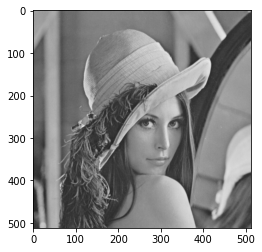

In [2]:
origin = cv2.imread("/content/drive/My Drive/lena_gray.bmp")
plt.imshow(origin)

In [3]:
print(origin.shape, origin.size)

(512, 512, 3) 786432


(512, 512) 262144


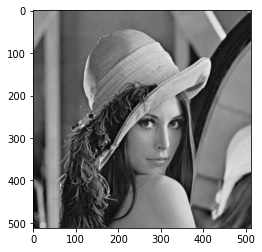

In [4]:
# convert image to gray-scale
image = cv2.imread("/content/drive/My Drive/lena_gray.bmp", 0)
print(image.shape, image.size)
plt.imshow(image, 'gray')

2D DFT

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6a0104c748>,
 Text(0.5, 1.0, 'Phase only image'))

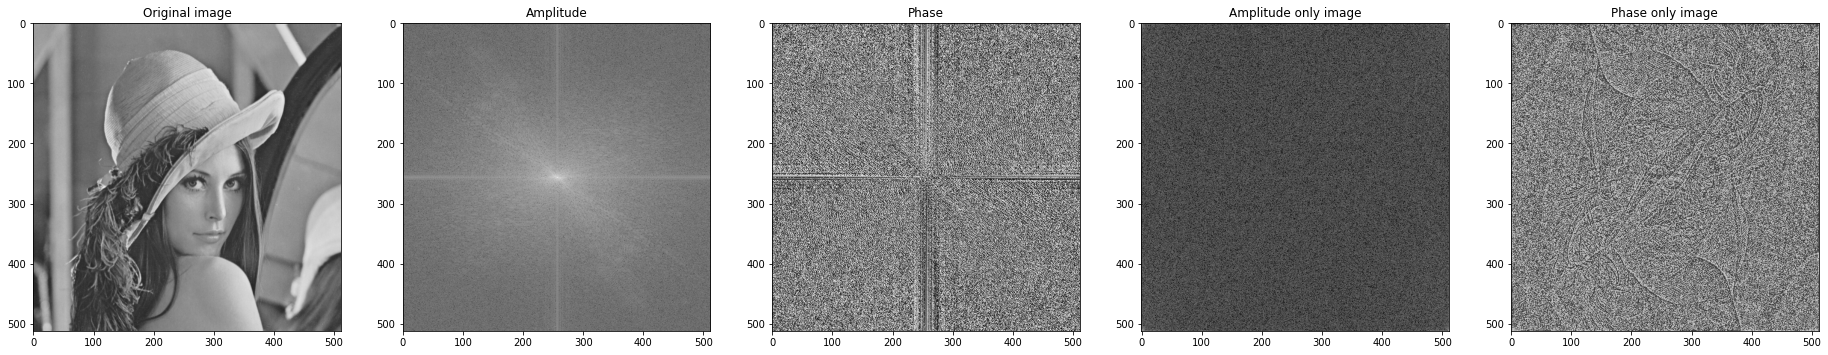

In [5]:
# 2DFT by using numpy
# amplitude and phase
im = np.fft.fft2(image)
im1 = np.fft.fftshift(im)
image_amp = np.log(np.abs(im1))
image_phase = np.angle(im1)

# Amplitude only image
im2 = np.fft.ifftshift(image_amp)
imap1 = np.fft.ifft2(im2)
imap = np.abs(10+np.log(imap1))

# phase only image
im3 = np.fft.ifftshift(image_phase)
imp1 = np.fft.ifft2(im3)
imp = np.angle(imp1)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151),plt.imshow(origin,cmap='gray'), plt.title( "Original image")
plt.subplot(152),plt.imshow(image_amp,cmap='gray'), plt.title( "Amplitude")
plt.subplot(153),plt.imshow(image_phase,cmap='gray'), plt.title( "Phase")
plt.subplot(154),plt.imshow(imap,cmap='gray'), plt.title( "Amplitude only image")
plt.subplot(155),plt.imshow(imp,cmap='gray'), plt.title( "Phase only image")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


(<matplotlib.axes._subplots.AxesSubplot at 0x7f6a00f0af60>,
 Text(0.5, 1.0, '2DFT Image block: 16x16'))

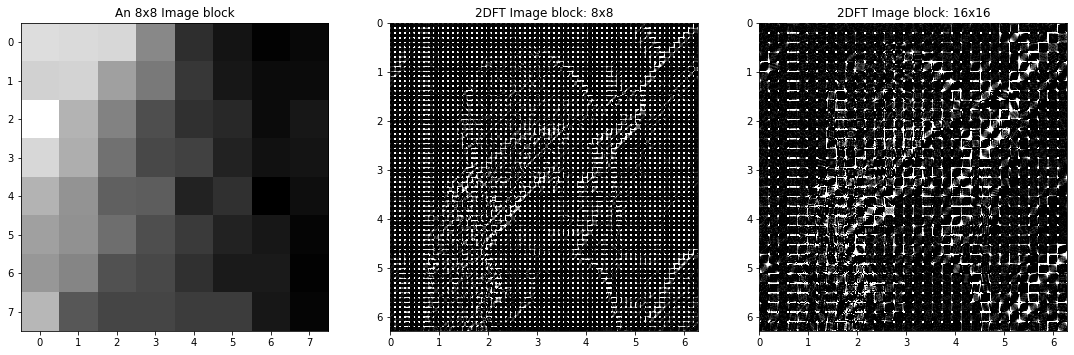

In [6]:
# compare image blocks between original image and 2DFT images: 8x8 and 16x16
imsize2 = image.shape
dft2 = np.zeros(imsize2)
dft23 = np.zeros(imsize2)
pos = 128

# 8x8 DFT
for i in r_[:imsize2[0]:8]:
    for j in r_[:imsize2[1]:8]:
        dft2[i:(i+8),j:(j+8)] = np.fft.fft2( image[i:(i+8),j:(j+8)] )

# 16x16 DFT
for i in r_[:imsize2[0]:16]:
    for j in r_[:imsize2[1]:16]:
        dft23[i:(i+16),j:(j+16)] = np.fft.fft2( image[i:(i+16),j:(j+16)] )

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151),plt.imshow(image[pos:pos+8,pos:pos+8],cmap='gray'), plt.title( "An 8x8 Image block")
plt.subplot(152),plt.imshow(dft2, cmap='gray',vmax= np.max(abs(dft2))*0.01,vmin = 0, extent=[0,2*pi,2*pi,0]), plt.title("2DFT Image block: 8x8")
plt.subplot(153),plt.imshow(dft23, cmap='gray',vmax= np.max(abs(dft2))*0.01,vmin = 0, extent=[0,2*pi,2*pi,0]), plt.title("2DFT Image block: 16x16")

In [0]:
# decentralized image
imgdft = np.fft.ifftshift(im1)
image_decen = np.log(1+np.abs(imgdft))

# procced image
imgdft2 = np.fft.ifft2(imgdft)
procced_img = np.abs(imgdft2)


(<matplotlib.axes._subplots.AxesSubplot at 0x7f6a00deb748>,
 (-0.5, 511.5, 511.5, -0.5),
 Text(0.5, 1.0, 'reconstructed image (2D DFT+IDFT)'))

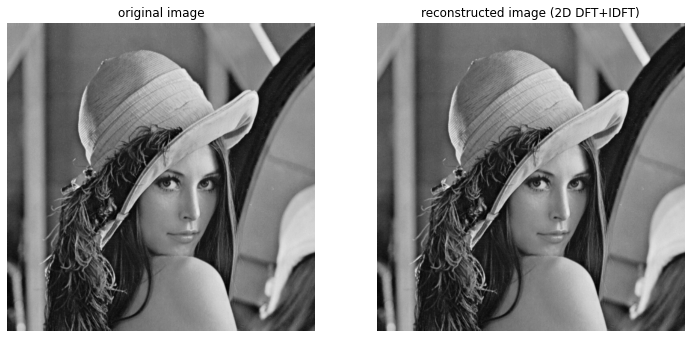

In [8]:
# show images -> 2D DFT
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151),plt.imshow(image, 'gray'), plt.axis('off'), plt.title('original image')
plt.subplot(152), plt.imshow(procced_img, 'gray'), plt.axis('off'), plt.title('reconstructed image (2D DFT+IDFT)')

In [9]:
# Calculate PSNR of 2D DFT between original image and reconstructed image
def compute_psnr(img1, img2):
  img1 = img1.astype(np.float64) / 255.
  img2 = img2.astype(np.float64) / 255.
  mse = np.mean((img1 - img2) ** 2)
  if mse == 0:
      return "Same Image"
  return 10 * math.log10(1. / mse)

psnr_dft2=compute_psnr(image,procced_img)
print(psnr_dft2)

328.3009794948789


1D DFT

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6a00cc59e8>,
 Text(0.5, 1.0, 'Phase only image'))

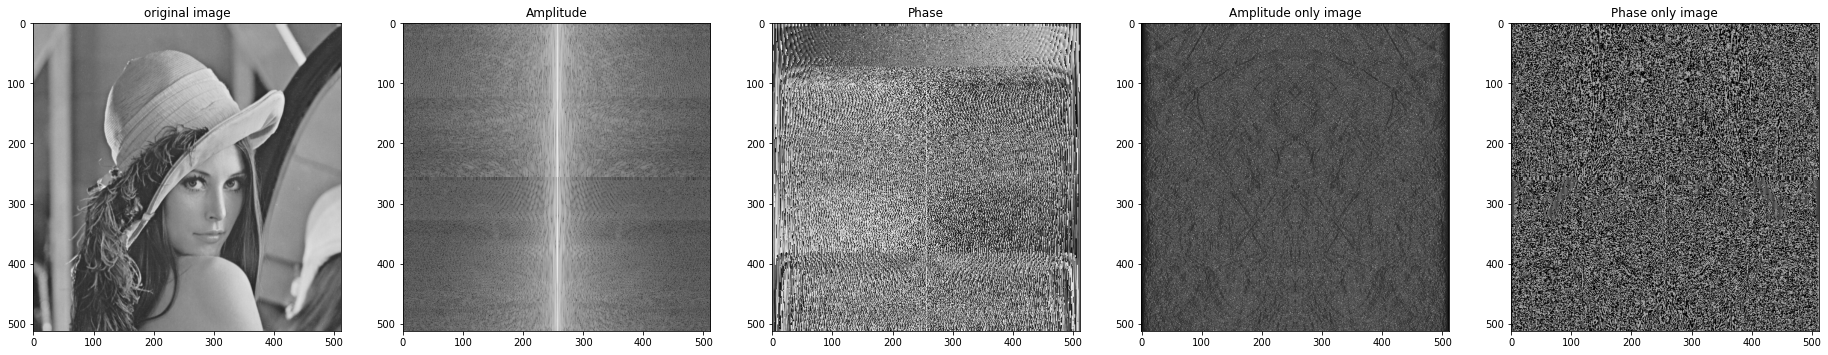

In [10]:
# 1DFT by using numpy
# amplitude and phase
img = np.fft.fft(image)
img1 = np.fft.fftshift(img)
img_amp = np.log(1+np.abs(img1))
img_phase = np.angle(img)


# Amplitude only image
img2 = np.fft.ifftshift(img_amp)
imgap1 = np.fft.ifft(img2)
imgap = np.abs(np.log(imgap1))

# phase only image
img3 = np.fft.ifftshift(img_phase)
imgp1 = np.fft.ifft(img3)
imgp = np.angle(imgp1)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151),plt.imshow(origin,cmap='gray'), plt.title( "original image")
plt.subplot(152),plt.imshow(img_amp,cmap='gray'), plt.title( "Amplitude")
plt.subplot(153),plt.imshow(img_phase,cmap='gray'), plt.title( "Phase")
plt.subplot(154),plt.imshow(imgap,cmap='gray'), plt.title( "Amplitude only image")
plt.subplot(155),plt.imshow(imgp,cmap='gray'), plt.title( "Phase only image")

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6a00b6d0f0>,
 Text(0.5, 1.0, 'Phase angle'))

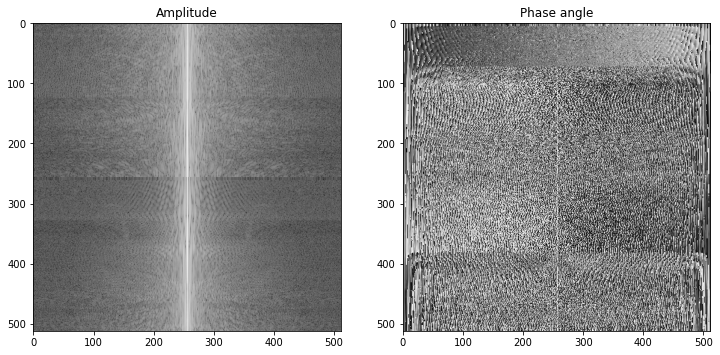

In [11]:
# 1DFT spectrum and phase angle
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151), plt.imshow(img_amp, "gray"), plt.title("Amplitude")
plt.subplot(152), plt.imshow(img_phase, "gray"), plt.title("Phase angle")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


(<matplotlib.axes._subplots.AxesSubplot at 0x7f6a00adf128>,
 Text(0.5, 1.0, '1DFT Image block: 16x16'))

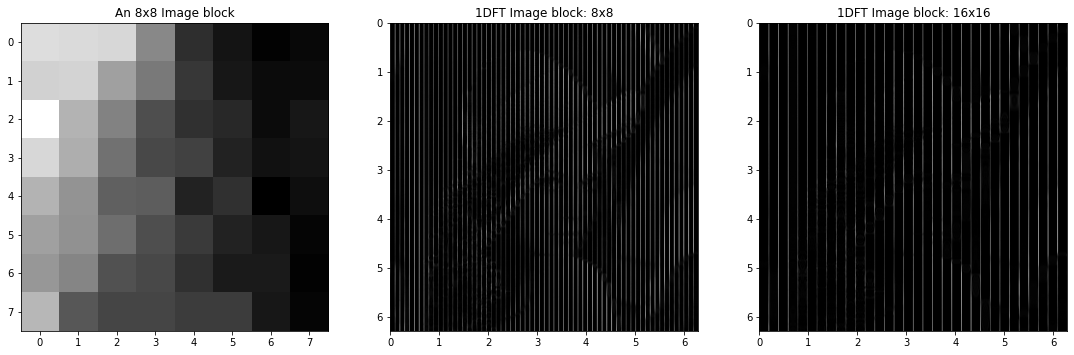

In [12]:
# compare image blocks between original image and 1DFT images: 8x8 and 16x16
imsize = image.shape
dft1 = np.zeros(imsize)
dft12 = np.zeros(imsize)
pos = 128

# 8x8 DFT
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dft1[i:(i+8),j:(j+8)] = np.fft.fft( image[i:(i+8),j:(j+8)] )

# 16x16 DFT
for i in r_[:imsize[0]:16]:
    for j in r_[:imsize[1]:16]:
        dft12[i:(i+16),j:(j+16)] = np.fft.fft( image[i:(i+16),j:(j+16)] )

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151),plt.imshow(image[pos:pos+8,pos:pos+8],cmap='gray'), plt.title( "An 8x8 Image block")
plt.subplot(152),plt.imshow(dft1, cmap='gray',vmax= np.max(abs(dft1)),vmin = 0, extent=[0,2*pi,2*pi,0]), plt.title("1DFT Image block: 8x8")
plt.subplot(153),plt.imshow(dft12, cmap='gray',vmax= np.max(abs(dft12)),vmin = 0, extent=[0,2*pi,2*pi,0]), plt.title("1DFT Image block: 16x16")

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6a009b4550>,
 Text(0.5, 1.0, '1D DFT Image'))

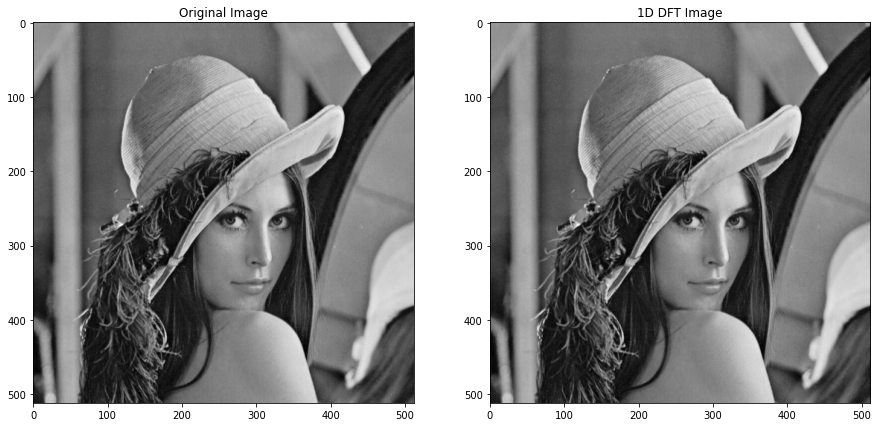

In [13]:
# decentralized image
imgdft1 = np.fft.ifftshift(img1)
image_decen1 = np.log(1+np.abs(imgdft1))

# procced image
img_dft1 = np.fft.ifft(imgdft1)
procced_img_dft1 = np.abs(img_dft1)

plt.figure(figsize=(15,15), constrained_layout=False)
plt.subplot(121), plt.imshow(image, cmap="gray"), plt.title("Original Image")
plt.subplot(122), plt.imshow(procced_img_dft1, cmap="gray"), plt.title("1D DFT Image")

In [14]:
# Calculate PSNR of 1D DFT between original image and reconstructed image

def compute_psnr(img1, img2):
  img1 = img1.astype(np.float64) / 255.
  img2 = img2.astype(np.float64) / 255.
  mse = np.mean((img1 - img2) ** 2)
  if mse == 0:
      return "Same Image"
  return 10 * math.log10(1. / mse)

psnr_dft1=compute_psnr(image,procced_img_dft1)
print(psnr_dft1)

332.36961165288903


1DCT and 2DCT

In [0]:
def dct1(a):
    return scipy.fftpack.dct( a, axis=0, norm='ortho' )

def idct1(a):
    return scipy.fftpack.idct( a, axis=0, norm='ortho')


def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6a008fb0f0>,
 Text(0.5, 1.0, '8x8 1DCTs of the image'))

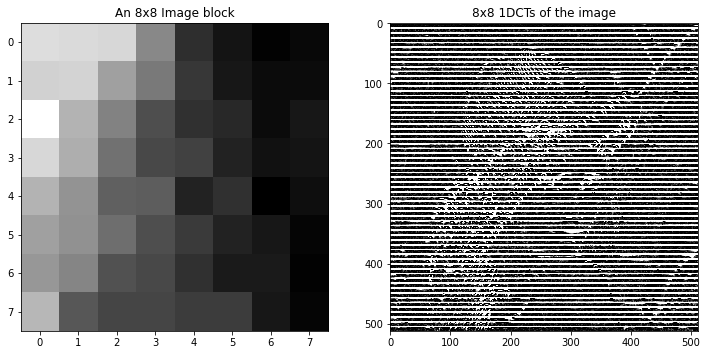

In [16]:
# compare image block between original image and 1DCT image blocks
# dct1
imagesize = image.shape
imdct1 = np.zeros(imagesize)
pos = 128

# Do 8x8 DCT on image (in-place)
for i in r_[:imagesize[0]:8]:
    for j in r_[:imagesize[1]:8]:
        imdct1[i:(i+8),j:(j+8)] = dct1( image[i:(i+8),j:(j+8)] )

image_block1 = image[pos:pos+8,pos:pos+8]

# show dct block images 
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151), plt.imshow(image_block1, "gray"), plt.title("An 8x8 Image block")
plt.subplot(152), plt.imshow(imdct1,cmap='gray',vmax = np.max(imdct1)*0.01,vmin = 0), plt.title("8x8 1DCTs of the image")

In [17]:
imF1 = dct1(image)
imR1 = idct1(imF1)

# check if the reconstructed image is nearly equal to the original image
np.allclose(image, imR1)

True

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6a0083b0f0>,
 (-0.5, 511.5, 511.5, -0.5),
 Text(0.5, 1.0, 'reconstructed image (DCT+IDCT)'))

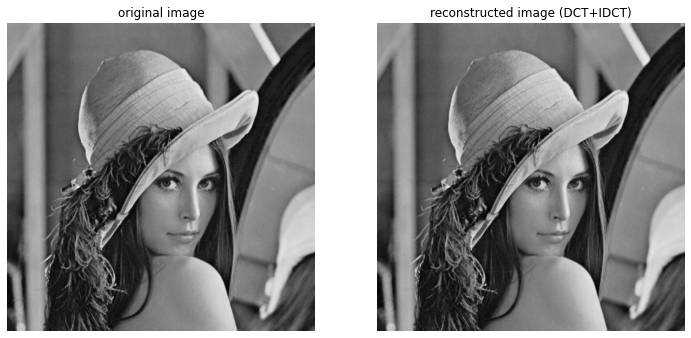

In [18]:
# show images -> 1DCT
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151),plt.imshow(image, 'gray'), plt.axis('off'), plt.title('original image')
plt.subplot(152), plt.imshow(imR1, 'gray'), plt.axis('off'), plt.title('reconstructed image (DCT+IDCT)')

In [19]:
# Calculate PSNR 1DCT between original image and reconstructed image using 1DCT
x,y = image.shape
MSE = 0
for i in range(x):
  for j in range(y):
    MSE = MSE + np.power((imR1[i,j] - image[i,j]),2) / (x*y)

dct1_psnr = 20*np.log10(np.amax(image)) - 10*np.log10(MSE)
print(dct1_psnr)

320.1697225561623


(<matplotlib.axes._subplots.AxesSubplot at 0x7f6a007e0ba8>,
 Text(0.5, 1.0, '8x8 2DCTs of the image'))

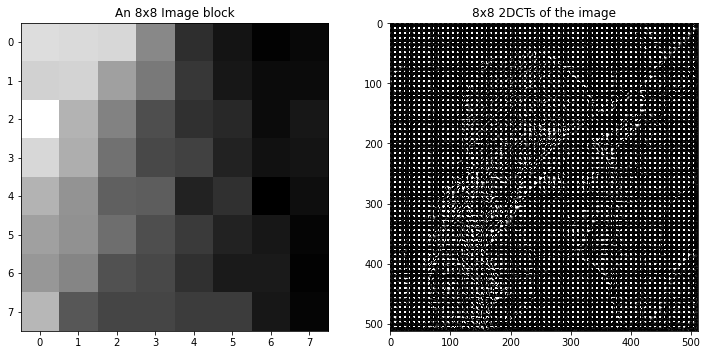

In [20]:
# compare image blocks between original image and dct2 image
imgsize = image.shape
dct = np.zeros(imgsize)
pos = 128

# Do 8x8 DCT on image (in-place)
for i in r_[:imgsize[0]:8]:
    for j in r_[:imgsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2( image[i:(i+8),j:(j+8)] )

image_block = image[pos:pos+8,pos:pos+8]

# show dct block images 
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151), plt.imshow(image_block, "gray"), plt.title("An 8x8 Image block")
plt.subplot(152), plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0), plt.title("8x8 2DCTs of the image")

In [21]:
imF = dct2(image)
imR = idct2(imF)

# check if the reconstructed image is nearly equal to the original image
np.allclose(image, imR)

True

In [22]:
# Calculate PNSR 2DCT between original image and reconstructed image
x,y = image.shape
mse = 0
for i in range(x):
  for j in range(y):
    mse = mse + np.power((imR[i,j] - image[i,j]),2) / (x*y)

PNSR = 20*np.log10(np.amax(image)) - 10*np.log10(mse)
print(PNSR)

314.7945387703195


In [23]:
# watermarking the image follow the instructions from sa.pdf
# there are different forms of water marking the image such as text, transparant image, etc.
# Set the desired image-quality to r [dB] in terms of PSNR
r = 40
# Q for rounding off a DCT coefficient
c = 255
Nx = 8
Ny = 8
Q = c * np.sqrt(3 * Nx * Ny) / np.power(10, 0.05 * r)
print("Q for rounding is",Q)

Q for rounding is 35.333836474405096


In [24]:
#  binary sequence represented as x
import random
x = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# Random shuffle the array x
random.shuffle(x)
print("Random binary sequence is ",x)

# Adjust binary sequences x into adjusted watermark sequences w
w = []
for x_k in x:
  w_k = Q * (x_k - 0.5)
  w.append(w_k)

Random binary sequence is  [1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0]


In [25]:
# Divide an entire image into blocks of Nx*Ny pixels and transform each blockby using 2D-DCT
img = cv2.cvtColor(origin, cv2.COLOR_BGR2GRAY)
height, width = img.shape
dctblock = [] 
blocknumber = int(height / Nx)

for i in range(blocknumber):
  for j in range(blocknumber):
    block = img[i*Nx:i*Nx + Nx, j*Ny:j*Ny + Ny]
    block = np.float32(block) / 255.0
    block = cv2.dct(block)
    dctblock.append(block)

print(np.shape(dctblock))

(4096, 8, 8)


In [0]:
#Choose an unwatermark block and select a coefficient reprented by pi from
# Nx*Ny length DCT coefficient vector p = {p_1,...,p_k,....,f_NxNy}

for i in range(len(w)):
  rand = random.randint(0, 63)
  block = dctblock[i]
  p = []
  for i in range(Nx):
    for j in range(Ny):
      p.append(block[i,j])
  pi = p[rand]
  pi = np.around(pi / Q) * Q

  # An element w_k of watermark sequences w is embedded into the previous
  # obtain pi 
  if (np.around(pi / Q) % 2 == 0):
    pi = pi + w[i]
  else:
    pi = pi - w[i]
  
  # Replace new pi to the block
  m = int(np.floor(rand / Nx))
  n = int(rand - m*Nx)
  block[m,n] = pi
  dctblock[i] = block


In [27]:
# Inverse 2DCT
watermark = np.zeros((height, width))
for i in range(blocknumber):
  for j in range(blocknumber):
    block = dctblock[i*blocknumber + j]
    block = cv2.idct(block)
    block = np.uint8(block*255)
    watermark[i*Nx:i*Nx + Nx, j*Ny:j*Ny + Ny] = block

# Calculate PSNR between original image and watermarked image
MSE = 0
for i in range(height):
  for j in range(width):
    MSE = MSE + np.power((watermark[i,j] - img[i,j]),2) / (height*width)

PSNR = 20*np.log10(np.amax(img)) - 10*np.log10(MSE)
print(PSNR)

33.82663122335211


(<matplotlib.axes._subplots.AxesSubplot at 0x7f69ffe2fe48>,
 (-0.5, 511.5, 511.5, -0.5),
 Text(0.5, 1.0, 'Watermarked Image by 2DCT'))

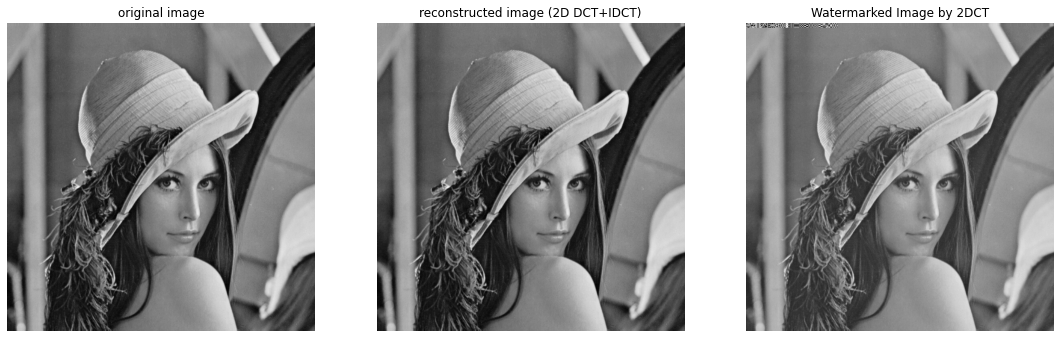

In [28]:
# show images -> 2DCT and watermarked image
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151),plt.imshow(image, 'gray'), plt.axis('off'), plt.title('original image')
plt.subplot(152), plt.imshow(imR, 'gray'), plt.axis('off'), plt.title('reconstructed image (2D DCT+IDCT)')
plt.subplot(153),plt.imshow(watermark, 'gray'), plt.axis('off'), plt.title('Watermarked Image by 2DCT')

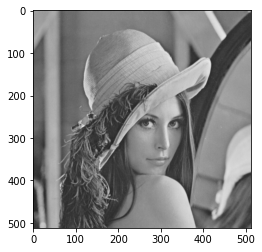

In [36]:
# text watermarking with opencv
img_rgb = cv2.cvtColor(origin, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb);

In [37]:
# Check data type of original image
print('image dtype ',img_rgb.dtype) 

image dtype  uint8


In [0]:
# create image of exact same size and zeros is to create a black image    
blank_img = np.zeros(shape=(img_rgb.shape[0],img_rgb.shape[1],3), dtype=np.uint8)  

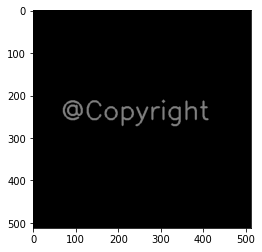

In [39]:
# define font size, input text
font = cv2.FONT_HERSHEY_SIMPLEX  
cv2.putText(blank_img,  
            text='@Copyright',  
            org=(img_rgb.shape[1]//8, img_rgb.shape[0]//2),   
            fontFace=font,  
            fontScale= 2,color=(128,128,128),  
            thickness=4,  
            lineType=cv2.LINE_4)  
plt.imshow(blank_img);

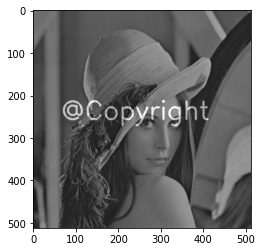

In [43]:
# original image is made a little light and watermark dark  
blended = cv2.addWeighted(src1=img_rgb,alpha=0.7,src2=blank_img,beta=1, gamma = 0)  
plt.imshow(blended);